### **CSCN-8000 Artificial Intelligence Algorithms and Mathematics**

#### **Lab-2**

**Submitted by : Nikhil Shankar C S**

**Id: 9026254**

#### **Practical Part A**

In [218]:
import pandas as pd
import sklearn as skl


df = pd.read_csv('data/Lab2_dataset.csv')
display(df)

df['label'].unique()

# Figuring out the meaning of Unnamed column. 
# Checking if its the word count
df['word count'] = df['text'].apply(lambda x: len(str(x).split()))
display(df)



,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


,Unnamed: 0,label,text,label_num,word count
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,67
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0,23
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0,550
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,48
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0,70
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0,155
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0,305
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0,78
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,111


> The unnamed column could be anything. Confirmed its not word count

In [219]:
print(f"Text : {df['text'][0]}")

Text : Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


#### **Vectorizing Text Column**

In [220]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

text_vector = vectorizer.fit_transform(df['text'])

print("Vector Representation:\n", text_vector.toarray())
print(f'Shape of vector : {text_vector.shape}')

print(f'Unique Word Count:\n{len(vectorizer.get_feature_names_out())}')



Vector Representation:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of vector : (5171, 50447)
Unique Word Count:
50447


**We can remove commonly used words that are insignificant ( Stop Words)**

In [221]:
vectorizer = CountVectorizer(stop_words='english')

text_vector = vectorizer.fit_transform(df['text'])

print("Vector Representation:\n", text_vector.toarray())
print(f'Shape of vector : {text_vector.shape}')

print(f'Unique Word Count:\n{len(vectorizer.get_feature_names_out())}')

Vector Representation:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of vector : (5171, 50140)
Unique Word Count:
50140


> Also we can see that "subject" is a word that is repeated in every row. So we can remove that as well.

In [222]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words_new = list(set(ENGLISH_STOP_WORDS).union(['subject']))

vectorizer = CountVectorizer(stop_words=stop_words_new)

text_vector = vectorizer.fit_transform(df['text'])

print("Vector Representation:\n", text_vector.toarray())
print(f'Shape of vector : {text_vector.shape}')

print(f'Unique Word Count:\n{len(vectorizer.get_feature_names_out())}')

exists = 'subject' in vectorizer.get_feature_names_out()
print(exists)


Vector Representation:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of vector : (5171, 50139)
Unique Word Count:
50139
False


#### **Split Dataset to Training and Test**

In [223]:
# In order to split data frame into two sets 
# training and test dataset we need to import scikit learning library 'model_selection' module.
# We can just split using array split options also but then it won't be randomized. The usage of the following function from scikit 
# allows to specify a random_state parameter which promises reproducibility even when the split is randomized. ie. If same dataset is passed to the train_test_split 
# function with the same parameter values and random_state key then the split would always be identical.

from sklearn.model_selection import train_test_split

training_text_split, test_text_split, training_labels_split, test_labels_split = train_test_split(text_vector, df['label'], test_size=0.2, random_state=25)


#### **RandomForestClassifier**

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np
import pandas as pd

def calculate_rfc_accuracy(n_estimators):
    start_time_train = time.time()
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(training_text_split, training_labels_split)
    end_time_train = time.time()
    training_time = end_time_train - start_time_train
    start_time_predict = time.time()
    predictions = rfc.predict(test_text_split)
    end_time_predict = time.time()
    prediction_time = end_time_predict - start_time_predict
    accuracy = accuracy_score(test_labels_split, predictions)
    return np.array([n_estimators, f'{training_time:.2f} seconds', f'{prediction_time:.2f} seconds', f'{accuracy * 100:.2f}%'])

rfc_analysis = np.empty((0,4))

for i in range(1,11):
    rfc_analysis = np.vstack((rfc_analysis, calculate_rfc_accuracy(i)))

rfc_analysis = np.vstack((rfc_analysis, calculate_rfc_accuracy(100)))
rfc_analysis_df = pd.DataFrame(rfc_analysis, columns=['No. of Estimators', 'Time', 'Prediction Time', 'Accuracy'])

#Commenting this to avoid hanging when running all code.
#calculate_rfc_accuracy(500)


#### **Analysis of performance of Random forest classifier**

In [225]:
display(rfc_analysis_df)

,No. of Estimators,Time,Prediction Time,Accuracy
0,1,0.18 seconds,0.00 seconds,91.01%
1,2,0.29 seconds,0.00 seconds,90.72%
2,3,0.41 seconds,0.00 seconds,93.53%
3,4,0.53 seconds,0.01 seconds,93.72%
4,5,0.65 seconds,0.01 seconds,95.46%
5,6,0.93 seconds,0.01 seconds,95.56%
6,7,1.09 seconds,0.01 seconds,96.62%
7,8,1.08 seconds,0.01 seconds,96.43%
8,9,1.21 seconds,0.01 seconds,96.33%
9,10,1.36 seconds,0.01 seconds,95.94%


> Tried running with 500 estimators and accuracy received was 97.78 compared to 97.68 with 100 estimators and time taken was around 90seconds while with 100 it was around 16~17 seconds

#### **Gaussian Naive Bayes Classifier**

In [226]:
from sklearn.naive_bayes import GaussianNB

def gaussian_nb_classifier(train_text, train_label, test_text, test_label):
    start_time = time.time()
    gnb = GaussianNB()
    gnb.fit(train_text, train_label)
    end_time = time.time()
    total_time = f'{(end_time - start_time):.2f} seconds'
    predictions = gnb.predict(test_text)
    accuracy = f'{accuracy_score(test_label, predictions) * 100}%'
    return np.array([total_time, accuracy])

gnb_analysis = np.empty((0,2))
gnb_analysis = np.vstack((gnb_analysis, gaussian_nb_classifier(training_text_split.toarray(), training_labels_split, test_text_split.toarray(), test_labels_split)))
gnb_analysis_df = pd.DataFrame(gnb_analysis, columns=['Time', 'Accuracy'])

#### **Analysis of GNB Classifier**

In [227]:
display(gnb_analysis_df)

,Time,Accuracy
0,3.92 seconds,96.1352657004831%


#### **Multinomial Naive Bayes Classifier**

In [228]:
from sklearn.naive_bayes import MultinomialNB

def multinomial_nb_classifier(train_text, train_label, test_text, test_label):
    start_time = time.time()
    gnb = MultinomialNB()
    gnb.fit(train_text, train_label)
    end_time = time.time()
    total_time = f'{(end_time - start_time):.2f} seconds'
    predictions = gnb.predict(test_text)
    accuracy = f'{accuracy_score(test_label, predictions) * 100}%'
    return np.array([total_time, accuracy])

mnb_analysis = np.empty((0,2))
mnb_analysis = np.vstack((mnb_analysis, multinomial_nb_classifier(training_text_split, training_labels_split, test_text_split, test_labels_split)))
mnb_analysis_df = pd.DataFrame(mnb_analysis, columns=['Time', 'Accuracy'])

#### **Analysis of MNB Classifier**

In [229]:
display(mnb_analysis_df)

,Time,Accuracy
0,0.02 seconds,98.74396135265701%


#### **Combined Analysis**

In [230]:
rfc_selected_columns = ['Time', 'Accuracy']
rfc_filter = rfc_analysis_df[rfc_analysis_df['No. of Estimators'] == '10']
rfc_final_df = rfc_filter[rfc_selected_columns]
rfc_final_df.insert(0, 'Name','RFC')
gnb_analysis_df.insert(0, 'Name','GNB')
mnb_analysis_df.insert(0, 'Name','MNB')
combined_df = pd.concat([rfc_final_df, gnb_analysis_df, mnb_analysis_df], ignore_index=True)
display(combined_df)


,Name,Time,Accuracy
0,RFC,1.36 seconds,95.94%
1,GNB,3.92 seconds,96.1352657004831%
2,MNB,0.02 seconds,98.74396135265701%


#### Observations

- Multinomial Naive Bayes is lightning fast and offers highest accuracy as well. 
- RFC even though close to the accuracy of MNB the time it took was enormous and that too for a relatively small dataset.
- For real world applications the dataset will be in millions and RFC should not be the first choice given the dataset can be used with MNB. 
- GNB is also a good model since it took only 4.6 seconds to achieve 96.13% accuracy. While to achieve the same accuracy RNB had to use 100 estimators and took around 14 seconds.



#### Reasoning

- MNB calculates probability using an equation which means that once the input is given the solution can be found in linear time by sustituting values in the equation whereas RFC needs to go through the process of splitting and creating trees and assigning weights which is done recursively hence can take polynomial time complexity.

#### **Practical Part-B**

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


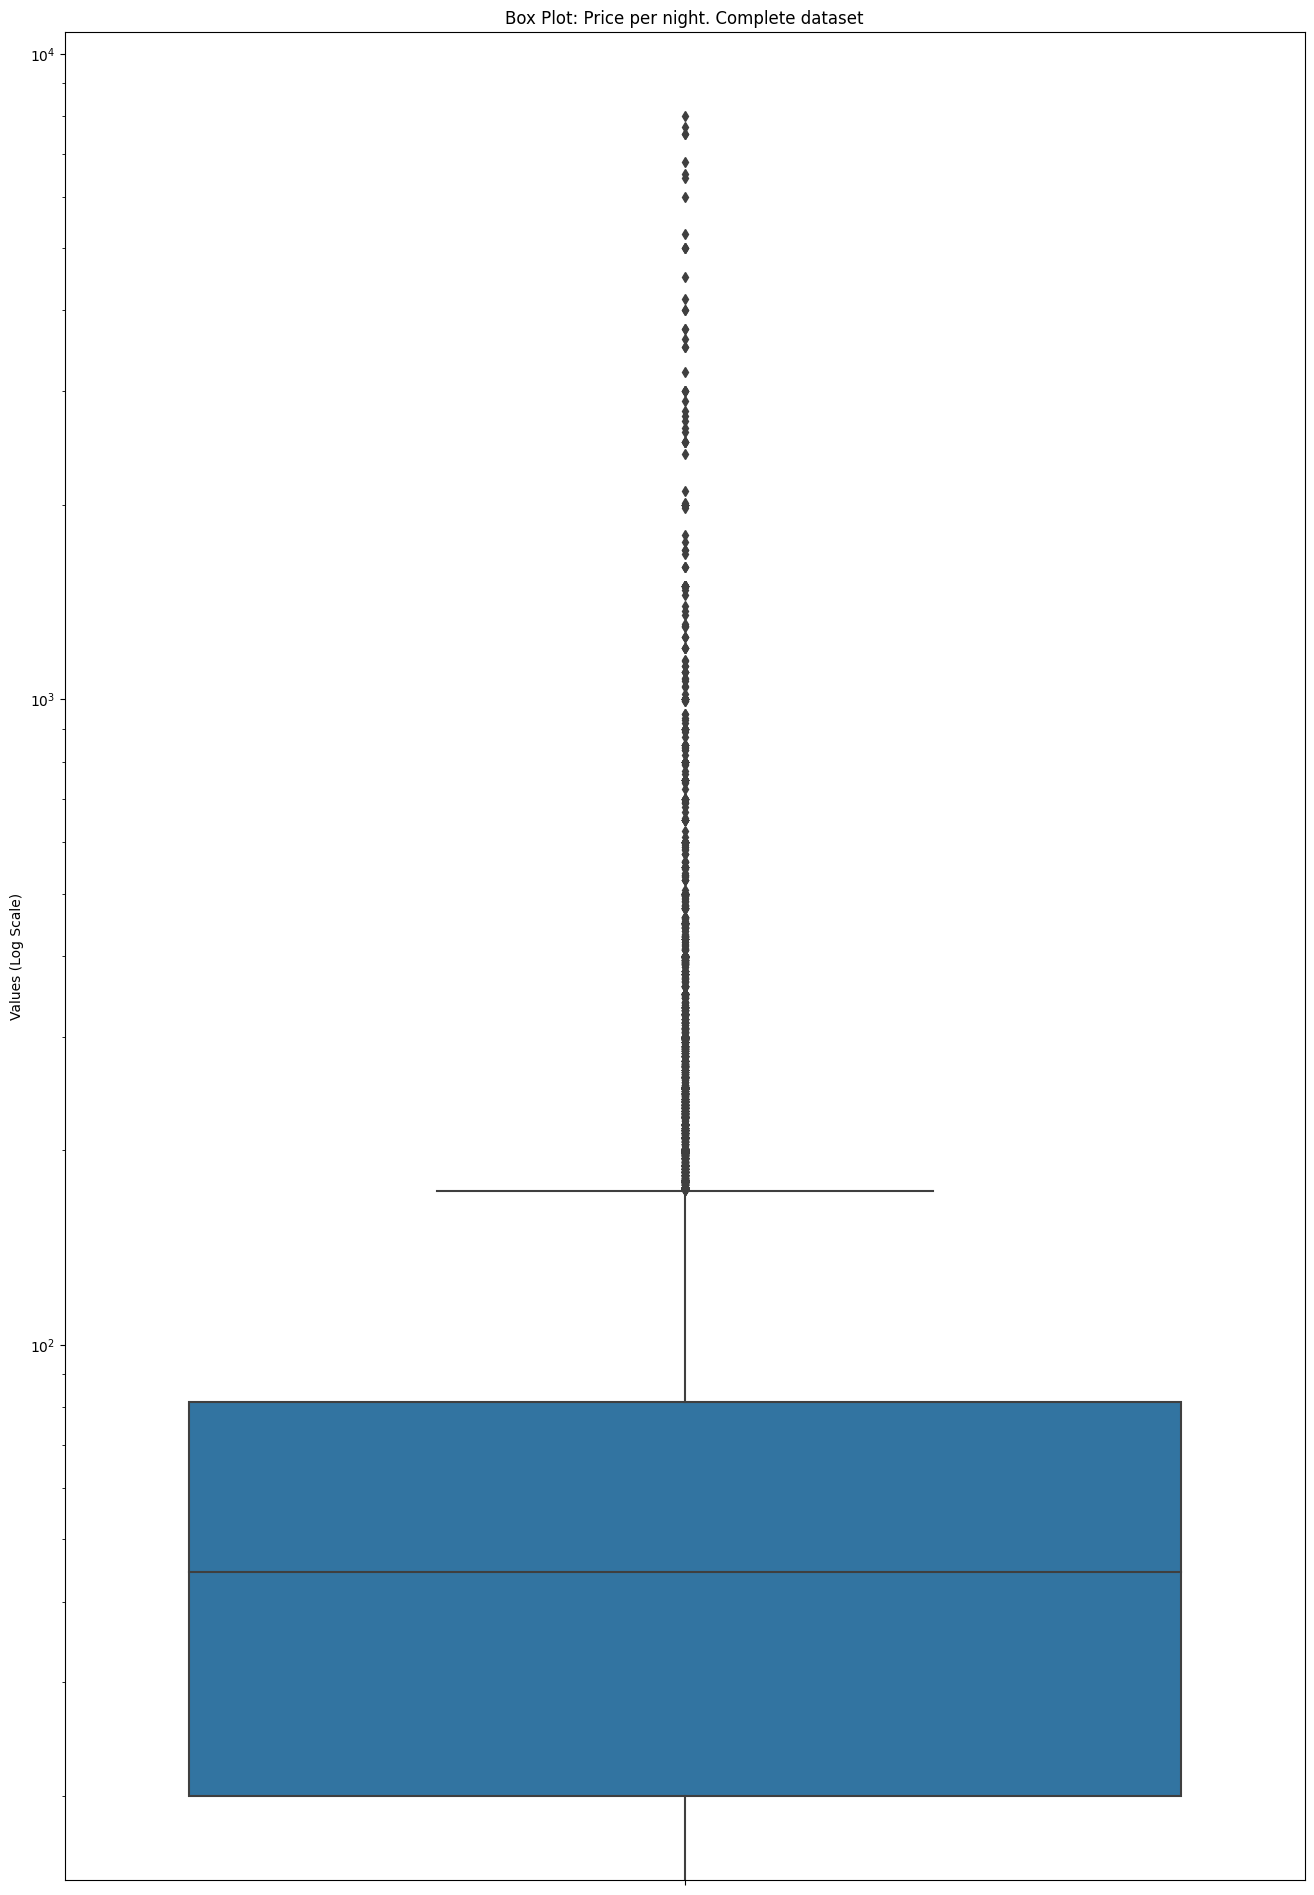

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/AB_NYC_2019.csv')
display(df)

df['price per night'] = df['price']/df['minimum_nights']

def plot_whisker(df, title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 24))
    sns.boxplot(y=df['price per night'])
    ax.set_title(title)
    plt.yscale('log')
    # Set labels and title
    plt.ylabel('Values (Log Scale)')
    plt.show()

plot_whisker(df, 'Box Plot: Price per night. Complete dataset')


In [232]:
# Calculate Upper Whisker Value

def calculate_upper_whisker_max_value(df):
    q1 = df['price per night'].quantile(0.25)
    q3 = df['price per night'].quantile(0.75)
    iqr = q3 - q1
    upper_whisker_value = q3 + (1.5 * iqr)
    max_value_inside_whisker = df[df['price per night'] <= upper_whisker_value]['price per night'].max()
    return max_value_inside_whisker

def split_at_value(df, column_name, value):
    df_new = df[df[column_name] > value]
    return np.array([[len(df), len(df_new), (len(df) - len(df_new)), df_new['price per night'].quantile(0.75)]])

upper_whisker_value = calculate_upper_whisker_max_value(df)
whisker_analysis = split_at_value(df, 'price per night', upper_whisker_value)
whisker_analysis_df = pd.DataFrame(whisker_analysis, columns=['Total', 'Outliers', 'Excluding Outliers', '3rd Quartile'])


#### **Outliers calculated using Whisker Plot**

In [233]:
display(whisker_analysis_df)

,Total,Outliers,Excluding Outliers,3rd Quartile
0,48895.0,3333.0,45562.0,325.0


#### **Outlier calculation using Z-Score**

In [234]:
import scipy.stats as stats

def calculate_zscore_and_split(df, column_name):
    z_scores = stats.zscore(df[column_name])
    new_zscore_colname = f'zscore_{column_name}'
    df[new_zscore_colname] = z_scores
    df_excluding_outliers = df[(df[new_zscore_colname] < 3) & (df[new_zscore_colname] > -3)]
    return np.array([[len(df), len(df) - len(df_excluding_outliers), len(df_excluding_outliers), df_excluding_outliers[column_name].quantile(0.75)]])

zscore_analysis_df = pd.DataFrame(calculate_zscore_and_split(df,'price per night'), columns=['Total', 'Outliers', 'Excluding Outliers', '3rd Quartile'])

#### **Outliers calculated using Z-Score**

In [235]:
display(zscore_analysis_df)

,Total,Outliers,Excluding Outliers,3rd Quartile
0,48895.0,306.0,48589.0,80.0


#### **Comparison**

In [236]:
zscore_analysis_df.insert(0, 'Type', 'Z-Score')
whisker_analysis_df.insert(0, 'Type', 'Whisker')
merged_df = pd.concat((zscore_analysis_df, whisker_analysis_df))
display(merged_df)

,Type,Total,Outliers,Excluding Outliers,3rd Quartile
0,Z-Score,48895.0,306.0,48589.0,80.0
0,Whisker,48895.0,3333.0,45562.0,325.0


> When comparing the two for removing outliers Whisker based approach seems to be the better one.

> The reason for z-score approach not performing well in removing outliers is because the data might not be normally distrbuted.

#### **Checking normality**

In [237]:
def check_shapiro_wilk_normality(data, title):
    statistic, p_value = stats.shapiro(data)
    # Interpretation
    alpha = 0.05
    return np.array([[title, statistic, p_value]])

column_name = 'price per night'
z_scores = stats.zscore(df[column_name])
new_zscore_colname = f'zscore_{column_name}'
df[new_zscore_colname] = z_scores
df_excluding_outliers = df[(df[new_zscore_colname] < 3) & (df[new_zscore_colname] > -3)]

q1 = df['price per night'].quantile(0.25)
q3 = df['price per night'].quantile(0.75)
iqr = q3 - q1
upper_whisker_value = q3 + (1.5 * iqr)
lower_whisker_value = q1 - (1.5 * iqr)
df_whisker = df[(df['price per night'] <= upper_whisker_value) & (df['price per night'] >= lower_whisker_value)]
   


normality_stats = np.empty((0,3))
normality_stats = np.vstack((normality_stats, check_shapiro_wilk_normality(df['price per night'],'With Outliers')))
normality_stats = np.vstack((normality_stats, check_shapiro_wilk_normality(df_excluding_outliers['price per night'],'Z-Score Method')))
normality_stats = np.vstack((normality_stats, check_shapiro_wilk_normality(df_whisker['price per night'],'Whisker Method')))

normality_stats_df = pd.DataFrame(normality_stats, columns=['Name', 'Statistic', 'P-Value'])

display(normality_stats_df)



c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48895.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48589.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45562.
  res = hypotest_fun_out(*samples, **kwds)


,Name,Statistic,P-Value
0,With Outliers,0.25639319805310556,1.546771785169921e-153
1,Z-Score Method,0.7554439615009354,4.426293448581631e-120
2,Whisker Method,0.9166790764924394,2.137315796916985e-90


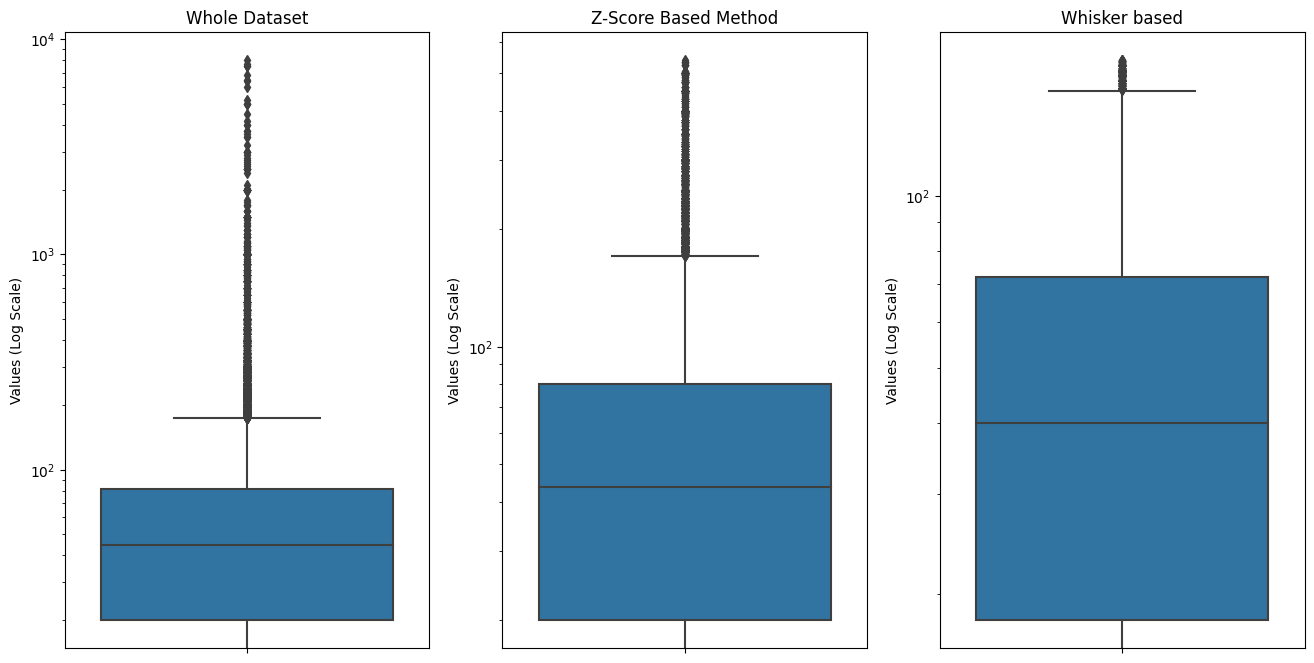

In [238]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 8))

sns.boxplot(y=df['price per night'], ax=ax[0])
ax[0].set_title("Whole Dataset")
ax[0].set_yscale('log')
# Set labels and title
ax[0].set_ylabel('Values (Log Scale)')

sns.boxplot(y=df_excluding_outliers['price per night'], ax=ax[1])
ax[1].set_title("Z-Score Based Method")
ax[1].set_yscale('log')
# Set labels and title
ax[1].set_ylabel('Values (Log Scale)')

sns.boxplot(y=df_whisker['price per night'], ax=ax[2])
ax[2].set_title("Whisker based")
ax[2].set_yscale('log')
# Set labels and title
ax[2].set_ylabel('Values (Log Scale)')

plt.show()


> From the plot its evident that Whisker method was better in correcting the dataset and removing outliers.

> In order to further improve the outliers we can run the whisker based approach for one more iteration.

#### **Whisker Iterative Cleaning Outliers**

In [239]:
def clean_data_outliers_whisker(df, column_name, iterations):
    stats = np.empty((0,5))
    df_copy = df.copy()
    for i in range(0,iterations):
        q1 = df_copy[column_name].quantile(0.25)
        q3 = df_copy[column_name].quantile(0.75)
        iqr = q3-q1
        bottom_whisker = q1 - (1.5 * iqr)
        upper_whisker = q3 + (1.5 * iqr)
        total_counts = len(df_copy)
        min = round(df_copy[column_name].min(),2)
        max = round(df_copy[column_name].max(),2)
        df_copy = df_copy[(df_copy[column_name] >= bottom_whisker) & (df_copy[column_name] <= upper_whisker)]
        stats = np.vstack((stats, [f'Iteration {i+1}', total_counts, total_counts - len(df_copy), min, max]))
    return df_copy, pd.DataFrame(stats, columns=['Iteration', 'Total Counts', 'Outliers','Min', 'Max'])

_,result = clean_data_outliers_whisker(df, 'price per night', 5)
display(result)




,Iteration,Total Counts,Outliers,Min,Max
0,Iteration 1,48895,3333,0.0,8000.0
1,Iteration 2,45562,551,0.0,173.33
2,Iteration 3,45011,756,0.0,153.0
3,Iteration 4,44255,158,0.0,148.0
4,Iteration 5,44097,4,0.0,143.75


> We have 4 more outliers left. So trying one more iteration should hopefully remove it.

In [240]:
final_df_whisker, stats_df = clean_data_outliers_whisker(df, 'price per night', 6)
display(stats_df)
total_outliers_removed = stats_df['Total Counts'].astype(int).max() - stats_df['Total Counts'].astype(int).min()
print('Total Iterations : 6')
print(f"Total Outliers removed : {total_outliers_removed}")
percent_outlier_whisker = round((total_outliers_removed/len(df))*100,2)
print(f'Percentage of outliers removed : {percent_outlier_whisker}%')


,Iteration,Total Counts,Outliers,Min,Max
0,Iteration 1,48895,3333,0.0,8000.0
1,Iteration 2,45562,551,0.0,173.33
2,Iteration 3,45011,756,0.0,153.0
3,Iteration 4,44255,158,0.0,148.0
4,Iteration 5,44097,4,0.0,143.75
5,Iteration 6,44093,0,0.0,142.86


Total Iterations : 6
Total Outliers removed : 4802
Percentage of outliers removed : 9.82%


#### **Trying Iterative approach with Z-Score**

In [241]:
def clean_data_outliers_with_zscore(df, column_name, iterations):
    stats_zscore = np.empty((0,5))
    df_copy = df.copy()
    df_copy.insert(0, 'zscore', 0)
    for i in range(0,iterations):
        zscores = stats.zscore(df_copy[column_name])
        df_copy['zscore'] = zscores
        total_counts = len(df_copy)
        min = round(df_copy[column_name].min(),2)
        max = round(df_copy[column_name].max(),2)
        df_copy = df_copy[(df_copy['zscore'] <= 3) & (df_copy['zscore'] >= -3)]
        stats_zscore = np.vstack((stats_zscore, [f'Iteration {i+1}', total_counts, total_counts - len(df_copy), min, max]))
    return df_copy, pd.DataFrame(stats_zscore, columns=['Iteration', 'Total Counts', 'Outliers', 'Min', 'Max'])

_, result = clean_data_outliers_with_zscore(df, 'price per night', 5)
display(result)

,Iteration,Total Counts,Outliers,Min,Max
0,Iteration 1,48895,306,0.0,8000.0
1,Iteration 2,48589,978,0.0,539.0
2,Iteration 3,47611,821,0.0,260.0
3,Iteration 4,46790,725,0.0,206.0
4,Iteration 5,46065,503,0.0,186.25


> Trying with 10

In [242]:
final_df_zscore, stats_df_with_zscore = clean_data_outliers_with_zscore(df, 'price per night', 10)
display(stats_df_with_zscore)
total_outliers_removed_with_zcore = stats_df_with_zscore['Total Counts'].astype(int).max() - stats_df_with_zscore['Total Counts'].astype(int).min()
percent_outlier_zscore = round((total_outliers_removed_with_zcore/len(df))*100,2)




,Iteration,Total Counts,Outliers,Min,Max
0,Iteration 1,48895,306,0.0,8000.0
1,Iteration 2,48589,978,0.0,539.0
2,Iteration 3,47611,821,0.0,260.0
3,Iteration 4,46790,725,0.0,206.0
4,Iteration 5,46065,503,0.0,186.25
5,Iteration 6,45562,154,0.0,173.33
6,Iteration 7,45408,97,0.0,166.33
7,Iteration 8,45311,22,0.0,164.0
8,Iteration 9,45289,0,0.0,162.67
9,Iteration 10,45289,0,0.0,162.67


#### **Final Analysis**

In [243]:

display(pd.DataFrame(np.array([["Whisker", 6, total_outliers_removed, percent_outlier_whisker],
                              ["Z-Score", 9, total_outliers_removed_with_zcore, percent_outlier_zscore]]), columns=['Method', 'Iterations', 'Total Outliers Removed', 'Percentage of Outliers Removed']))


,Method,Iterations,Total Outliers Removed,Percentage of Outliers Removed
0,Whisker,6,4802,9.82
1,Z-Score,9,3606,7.37


> Removing outliers using different methods will give different results. 

> Using whisker method we only had to do 6 iterations to get rid of outliers but it removed around 9.82% of the total dataset which is almost 10 percentage. 

> Using Z-Score we had to do more iterations but it identified 7.37% as outliers.

>> There is no better method when it comes to outlier removal. It all depends on the model that we want to create, our tolerance to removing datapoints, which algorithm is going to be used after cleaning of the data, whether the method is theoretically supposed to be used with the given dataset and its distribution etc.

>> One thing to note here is that using Shapiro Wilkins Test we initially found out that the data is not normally distributed. So it would be better to consider Whisker based approach to remove outliers since z-score approach is not suggested for dataset which is not normally distributed.

#### **Plotting Histogram to Check Results Before and After**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wi

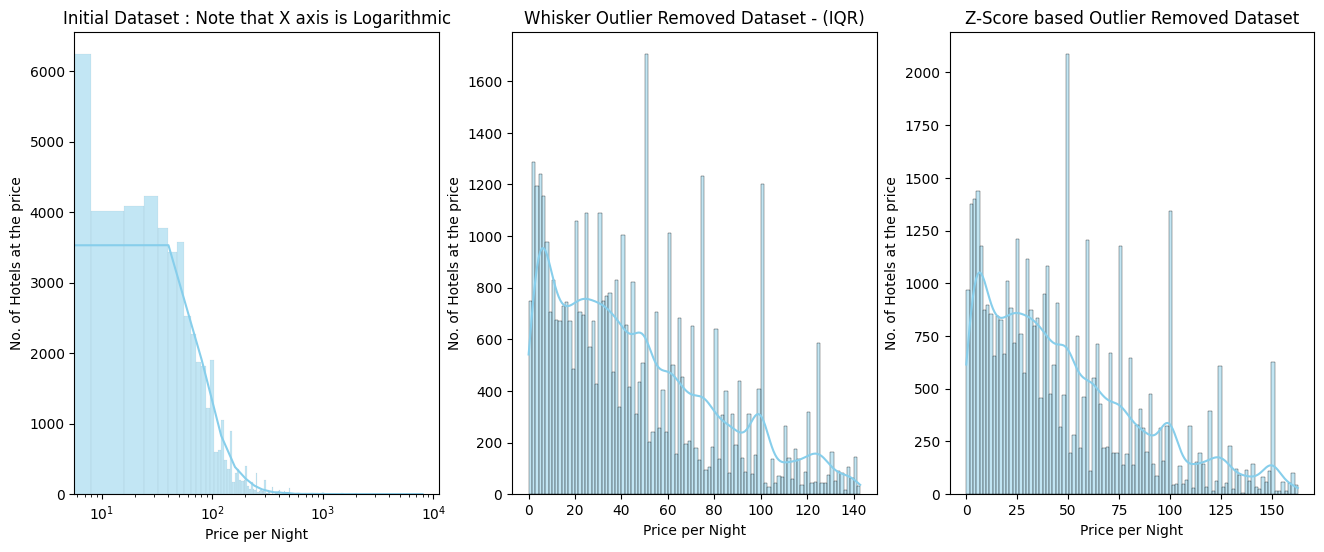

In [252]:
fig,ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 6))
sns.histplot(df['price per night'], bins=1000, kde=True, color='skyblue', ax=ax[0])
sns.histplot(final_df_whisker['price per night'], bins=100, kde=True, color='skyblue', ax=ax[1])
sns.histplot(final_df_zscore['price per night'], bins=100, kde=True, color='skyblue', ax=ax[2])

ax[0].set_xlabel('Price per Night')
ax[0].set_ylabel('No. of Hotels at the price')
ax[0].set_title('Initial Dataset : Note that X axis is Logarithmic')
ax[0].set_xscale('log')

ax[1].set_xlabel('Price per Night')
ax[1].set_ylabel('No. of Hotels at the price')
ax[1].set_title('Whisker Outlier Removed Dataset - (IQR)')

ax[2].set_xlabel('Price per Night')
ax[2].set_ylabel('No. of Hotels at the price')
ax[2].set_title('Z-Score based Outlier Removed Dataset')

plt.show()




>> So from the histogram we can see that both methods are succesfull in removing the outliers and the histogram also suggests that the result is identical. While IQR method eliminated almost 10% of data Z-Score approach eliminated only 7.4% of data with more higher values retained. So based on the range we want to train our model for we can choose between either of them.